---
# Jupyter Guide

> Jupyter Guide

- key1: value1
- key2: value2
- categories: [c1, c2]

- skip_showdoc: true
- skip_exec: true
  
format:
  html:
    mermaid:
      theme: forest


---

## Customize Jupyter Labs

```bash
pip install jupyterthemes
```

In [ ]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


### jupyter lab config

```bash
jupyter notebook --generate-config


```

To view jupyter config
```bash
cat ~/.jupyter/jupyter_notebook_config.py
sudo vim ~/.jupyter/jupyter_notebook_config.py
```

    c.NotebookApp.ip = '0.0.0.0'
    c.NotebookApp.port = 8888
    c.NotebookApp.open_browser = False

### Jupyter Lab Extensions 

- jupyter-notebook-lab-extension
- jupyter-widgets-jupyterlab-manager
- jupyterlab-code-formatter
- jupyterlab-contrib-spellchecker
- jupyterlab-git
- jupyterlab-latex
- jupyterlab-quarto
- jupyterlab-pygments
- nbdime-jupyterlab
- 

## Other Important Considerations

There are a couple of shortcuts you must know about which we use **all** the time (always in **Command Mode**). These are:

- <kbd>Shift</kbd>+<kbd>Enter</kbd>: Run the code or markdown on a cell
- <kbd>Up Arrow</kbd> / <kbd>Down Arrow</kbd>: Toggle across cells
- <kbd>b</kbd>: Create new cell underneath this one
- <kbd>0</kbd>+<kbd>0</kbd>: Reset Kernel

You can find more shortcuts by typing <kbd>h</kbd> (for help).

You may need to use shell commands, like `ls` or `cat` in a Jupyter Notebook environment. That is very easy to do: just type `!` before you shell command, like so:

In [ ]:
ls -hidden

ls: invalid option -- 'e'
Try 'ls --help' for more information.


## Markdown Formatting

### Images

    ![title](panda.jpg)
![title](Data/panda.jpg)

### Italics, Bold, Strikethrough, Inline, Blockquotes and Links

The five most important concepts to format your code appropriately when using Markdown are:
    
- *Italics*:: Surround your text with \_ or \*.

- **Bold**:: Surround your text with \__ or \**.

- `inline`:: Surround your text with \`.

- blockquote:: Place \> before your text.

- superscript^2^ / subscript~2~

- [Links](http://course-v3.fast.ai/):: Surround the text you want to link with \[\] and place the link adjacent to the text, surrounded with ().

### Headings

(# is level one, ## is level two, ### is level three and #### is level four)

### Lists

There are three types of lists in markdown.

Ordered list:

1. Step 1
    2. Step 1B
3. Step 3

Unordered list

* learning rate
- cycle length
+ weight decay

Task list

- [x] Learn Jupyter Notebooks
    - [x] Writing
    - [x] Modes
    - [x] Other Considerations
- [ ] Change the world



In the notebook, double click on them to see how they are built! 


## Tables

::: {#tbl-panel layout-ncol=2}
| Col1 | Col2 | Col3 |
|------|------|------|
| A    | B    | C    |
| E    | F    | G    |
| A    | G    | G    |

: First Table {#tbl-first}

| Col1 | Col2 | Col3 |
|------|------|------|
| A    | B    | C    |
| E    | F    | G    |
| A    | G    | G    |

: Second Table {#tbl-second}

Main Caption
:::


+-----------+-----------+--------------------+
| Fruit     | Price     | Advantages         |
+===========+===========+====================+
| Bananas   | $1.34     | - built-in wrapper |
|           |           | - bright color     |
+-----------+-----------+--------------------+
| Oranges   | $2.10     | - cures scurvy     |
|           |           | - tasty            |
+-----------+-----------+--------------------+

: Sample grid table.


| Right | Left | Default | Center |
|------:|:-----|---------|:------:|
|   12  |  12  |    12   |    12  |
|  123  |  123 |   123   |   123  |
|    1  |    1 |     1   |     1  |

: Fruit prices {.striped .hover}

| fruit  | price  |
|--------|--------|
| apple  | 2.05   |
| pear   | 1.37   |
| orange | 3.09   |

: Fruit prices {tbl-colwidths="[75,25]"}

In [ ]:
#|eval: false
#|code-fold: true

from graphviz import Digraph

def create_nodes(graph, items, colours):
    with graph.subgraph(name=f'{items[0]}') as c:
        c.attr(style='filled', fillcolor=colours[0], label=items[0][7:], rank = 'same', fontcolor=colours[2])
        c.node_attr.update(style='filled', fillcolor=colours[1], shape='box', fontcolor=colours[2])
        for data in items[1:]: c.node(f'{data}', f'{data}')
        
def create_edges(graph, Begin, End, colour):
    for beginning in Begin[1:]: 
        for towards in End[1:]: graph.edge(f'{beginning}', f'{towards}', len='5.00', color = colour[4])
    

In [ ]:
#|eval: false
#|code-fold: true

primary = '#FFFFFF'
secondary = '#F6AE2D'
third = '#002855'
bg = '#F1FAF0'
fifth = '#002855'

colours = [primary, secondary, third, bg, fifth]

Buckets = ['clusterBuckets', 'Energy_1hour_integral', 'Power_5min_avg', 'Weather']

Process = ['clusterProcess', 'MinMaxScalar', 'Seasonal_decompose']

Stats = ['clusterStats', 'AutoARIMA', 'HaltWinter', 'MSTL', 'FFT', 'SeasonNaive']

ML = ['clusterML', 'LGBMRegressor', 'XGBRegressor', 'LinearRegression']

Neural = ['clusterNeural', 'NBEATS', 'NHITS', 'MLP']
          
Evaluate = ['clusterEvaluate', 'mase', 'mae', 'mape', 'rmse', 'smape']

Nodes = [Buckets, Process, Stats, ML, Neural, Evaluate]
# Create a directed graph
graph = Digraph(filename = 'test', directory = './Data', engine = 'dot')
graph.attr('graph', style='filled', bgcolor=colours[3])
graph.graph_attr['rankdir'] = 'LR'


for items in Nodes:
    create_nodes(graph, items, colours)


# Add edges  
create_edges(graph, Buckets, Process, colours)

create_edges(graph, Process, Stats, colours)
create_edges(graph, Process, ML, colours)
create_edges(graph, Process, Neural, colours)

create_edges(graph, Stats, Evaluate, colours)
create_edges(graph, ML, Evaluate, colours)
create_edges(graph, Neural, Evaluate, colours)

# Save the graph as a PNG file
graph.render( format='svg', cleanup=False)

'Data/test.svg'

![title](Data/test.svg)

In [ ]:
#|eval: false
#|code-fold: true

from graphviz import Digraph
import graphviz

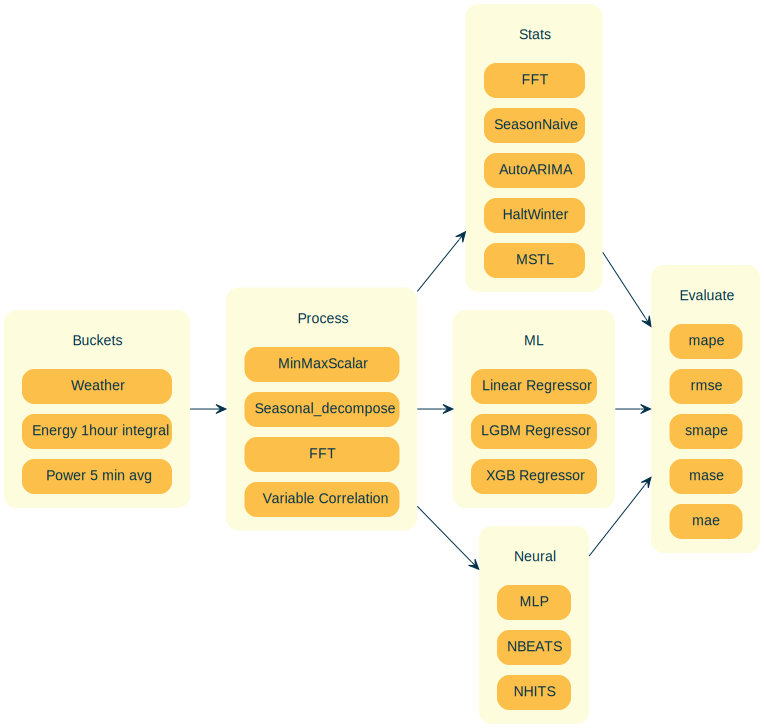

In [ ]:
#|eval: false
#|code-fold: true


from nbdevAuto.functions import graph

g = graph('A', filename='Data/plan', engine = 'dot')
    


buc = 'buc'

g.node('Buckets',
        f'''<<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="10" CELLPADDING="10" STYLE = "rounded">
          <TR><TD PORT="{buc}" BORDER="0" STYLE = "rounded" WIDTH="50" >Buckets</TD></TR>
          <TR><TD PORT="Weather" STYLE = "rounded" BGCOLOR="{g.secondary}" >Weather</TD></TR>
          <TR><TD PORT="Energy" STYLE = "rounded" BGCOLOR="{g.secondary}" >Energy 1hour integral</TD></TR>
          <TR><TD PORT="Power" STYLE = "rounded" BGCOLOR="{g.secondary}" >Power 5 min avg</TD></TR>
        </TABLE>>''',
        fillcolor=g.primary,
        penwidth = '0')



g.node('Process',
        f'''<<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="10" CELLPADDING="10" STYLE = "rounded">
          <TR><TD PORT="Pro" BORDER="0" STYLE = "rounded" WIDTH="50" >Process</TD></TR>
          <TR><TD PORT="MinMax" STYLE = "rounded" BGCOLOR="{g.secondary}" >MinMaxScalar</TD></TR>
          <TR><TD PORT="Seasonal" STYLE = "rounded" BGCOLOR="{g.secondary}" >Seasonal_decompose</TD></TR>
          <TR><TD PORT="FFT" STYLE = "rounded" BGCOLOR="{g.secondary}" >FFT</TD></TR>
          <TR><TD PORT="Correlation" STYLE = "rounded" BGCOLOR="{g.secondary}" >Variable Correlation</TD></TR>
        </TABLE>>''',
        fillcolor=g.primary,
        penwidth = '0')


g.node('Stats',
        f'''<<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="10" CELLPADDING="10" STYLE = "rounded">
          <TR><TD PORT="sta" BORDER="0" STYLE = "rounded" WIDTH="50" >Stats</TD></TR>
          <TR><TD PORT="FFT" STYLE = "rounded" BGCOLOR="{g.secondary}" >FFT</TD></TR>
          <TR><TD PORT="Naive" STYLE = "rounded" BGCOLOR="{g.secondary}" >SeasonNaive</TD></TR>
          <TR><TD PORT="ARIMA" STYLE = "rounded" BGCOLOR="{g.secondary}" >AutoARIMA</TD></TR>
          <TR><TD PORT="HaltWinter" STYLE = "rounded" BGCOLOR="{g.secondary}" >HaltWinter</TD></TR>
          <TR><TD PORT="MSTL" STYLE = "rounded" BGCOLOR="{g.secondary}" >MSTL</TD></TR>
        </TABLE>>''',
        fillcolor=g.primary,
        penwidth = '0')

g.node('ML',
        f'''<<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="10" CELLPADDING="10" STYLE = "rounded">
          <TR><TD PORT="M" BORDER="0" STYLE = "rounded" WIDTH="50" >ML</TD></TR>
          <TR><TD PORT="LinearRegression" STYLE = "rounded" BGCOLOR="{g.secondary}" >Linear Regressor</TD></TR>
          <TR><TD PORT="LGBM" STYLE = "rounded" BGCOLOR="{g.secondary}" >LGBM Regressor</TD></TR>
          <TR><TD PORT="XGB" STYLE = "rounded" BGCOLOR="{g.secondary}" >XGB Regressor</TD></TR>
        </TABLE>>''',
        fillcolor=g.primary,
        penwidth = '0')


g.node('Neural',
        f'''<<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="10" CELLPADDING="10" STYLE = "rounded">
          <TR><TD PORT="Neu" BORDER="0" STYLE = "rounded" WIDTH="50" >Neural</TD></TR>
          <TR><TD PORT="MLP" STYLE = "rounded" BGCOLOR="{g.secondary}" >MLP</TD></TR>
          <TR><TD PORT="NBEATS" STYLE = "rounded" BGCOLOR="{g.secondary}" >NBEATS</TD></TR>
          <TR><TD PORT="NHITS" STYLE = "rounded" BGCOLOR="{g.secondary}" >NHITS</TD></TR>
        </TABLE>>''',
        fillcolor=g.primary,
        penwidth = '0')

g.node('Evaluate',
        f'''<<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="10" CELLPADDING="10" STYLE = "rounded">
          <TR><TD PORT="Eval" BORDER="0" STYLE = "rounded" WIDTH="50" >Evaluate</TD></TR>
          <TR><TD PORT="mape" STYLE = "rounded" BGCOLOR="{g.secondary}" >mape</TD></TR>
          <TR><TD PORT="rmse" STYLE = "rounded" BGCOLOR="{g.secondary}" >rmse</TD></TR>
          <TR><TD PORT="smape" STYLE = "rounded" BGCOLOR="{g.secondary}" >smape</TD></TR>
          <TR><TD PORT="mase" STYLE = "rounded" BGCOLOR="{g.secondary}" >mase</TD></TR>
          <TR><TD PORT="mae" STYLE = "rounded" BGCOLOR="{g.secondary}" >mae</TD></TR>
          
        </TABLE>>''',
        fillcolor=g.primary,
        penwidth = '0')


g.edge('Buckets', 'Process')

g.edge('Process', 'Stats')
g.edge('Process', 'ML')
g.edge('Process', 'Neural')


g.edge('Stats', 'Evaluate')
g.edge('ML', 'Evaluate')
g.edge('Neural', 'Evaluate')



g.render(format='svg', cleanup=False)


g


```{=html}
<table>
  <caption>As described in the section above, Quarto tables are great.</caption>
  <thead>
    <tr>
      <th>Header 1</th>
      <th>Header 2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/220px-African_Bush_Elephant.jpg" alt="African Bush Elephant" /></td>
      <td>Regular output</td>
    </tr>
  </tbody>
</table>
```

## Diagrams

```{dot}
digraph {
    A -> B;
    A -> C;
    B -> D;
    C -> D;
}
```

import graphviz
dot_data = '''
digraph {
    A -> B;
    A -> C;
    B -> D;
    C -> D;
}
'''
graph = graphviz.Source(dot_data)
graph

```{mermaid}
flowchart LR
  A[Hard edge] --> B(Round edge)
  B --> C{Decision}
  C --> D[Result one]
  C --> E[Result two]
```

```{mermaid}
sequenceDiagram
  participant Alice
  participant Bob
  Alice->>John: Hello John, how are you?
  loop Healthcheck
    John->>John: Fight against hypochondria
  end
  Note right of John: Rational thoughts <br/>prevail!
  John-->>Alice: Great!
  John->>Bob: How about you?
  Bob-->>John: Jolly good!
```

```{mermaid}
---
title: Animal example
---
classDiagram
    note "From Duck till Zebra"
    Animal <|-- Duck
    note for Duck "can fly\ncan swim\ncan dive\ncan help in debugging"
    Animal <|-- Fish
    Animal <|-- Zebra
    Animal : +int age
    Animal : +String gender
    Animal: +isMammal()
    Animal: +mate()
    class Duck{
        +String beakColor
        +swim()
        +quack()
    }
    class Fish{
        -int sizeInFeet
        -canEat()
    }
    class Zebra{
        +bool is_wild
        +run()
    }
```

```{mermaid}
stateDiagram
    [*] --> Still
    Still --> [*]

    Still --> Moving
    Moving --> Still
    Moving --> Crash
    Crash --> [*]

```

```{mermaid}
---
title: Order example
---
erDiagram
    CUSTOMER ||--o{ ORDER : places
    ORDER ||--|{ LINE-ITEM : contains
    CUSTOMER }|..|{ DELIVERY-ADDRESS : uses

```

```{mermaid}
journey
    title My working day
    section Go to work
      Make tea: 5: Me
      Go upstairs: 3: Me
      Do work: 1: Me, Cat
    section Go home
      Go downstairs: 5: Me
      Sit down: 5: Me
```

```{mermaid}
gantt
    dateFormat HH:mm
    axisFormat %H:%M
    Initial milestone : milestone, m1, 17:49, 2m
    Task A : 10m
    Task B : 5m
    Final milestone : milestone, m2, 18:08, 4m
```

```{mermaid}
pie title Pets adopted by volunteers
    "Dogs" : 386
    "Cats" : 85
    "Rats" : 15
```

```{mermaid}
---
title: Example Git diagram
---
gitGraph
   commit
   commit
   branch develop
   checkout develop
   commit
   commit
   checkout main
   merge develop
   commit
   commit
```

```{mermaid}
timeline
        title History of Social Media Platform
          2002 : LinkedIn
          2004 : Facebook : Google
          2005 : Youtube
          2006 : Twitter
```

## Callouts

::: {.callout-note}
Note that there are five types of callouts, including:
`note`, `warning`, `important`, `tip`, and `caution`.
:::

::: {.callout-tip}
## Tip with Title

This is an example of a callout with a title.
:::

::: {.callout-caution collapse="true"}
## Expand To Learn About Collapse

This is an example of a 'folded' caution callout that can be expanded by the user. You can use `collapse="true"` to collapse it by default or `collapse="false"` to make a collapsible callout that is expanded by default.
:::

## Videos

{{< video local-video.mp4 >}}

{{< video https://www.youtube.com/embed/wo9vZccmqwc >}}

{{< video https://vimeo.com/548291297 >}}

{{< video https://youtu.be/wo9vZccmqwc width="400" height="300" >}}

{{< video https://www.youtube.com/embed/wo9vZccmqwc
    title="What is the CERN?"
    start="116"
    aspect-ratio="21x9" 
>}}

## Code Capabilities

In [ ]:
a = 1
b = a + 1
c = b + a + 1
d = c + b + a + 1
a, b, c ,d

(1, 2, 4, 8)

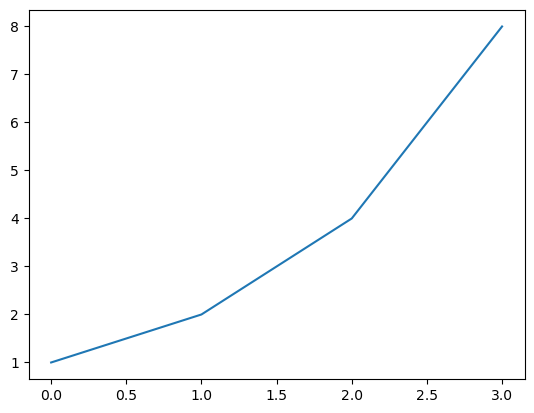

In [ ]:
import matplotlib.pyplot as plt

plt.plot([a,b,c,d])
plt.show()

## Shortcuts and Tricks

### Command Mode Shortcuts

There are a couple of useful keyboard shortcuts in `Command Mode` that you can leverage to make Jupyter Notebook faster to use. Remember that you can switch back and forth between `Command Mode` and `Edit Mode` with <kbd>Esc</kbd> and <kbd>Enter</kbd>.

- m:: Convert cell to Markdown
- y:: Convert cell to Code
- d+d:: Delete cell
- o:: Toggle between hide or show output
- Shift+Arrow up/Arrow down:: Select multiple cells. Once you have selected them you can operate on them like a batch (run, copy, paste etc).
- Shift+M:: Merge selected cells


### Cell Tricks

There are also some tricks that you can code into a cell:

- `?function-name`:: Shows the definition and docstring for that function
- `??function-name`:: Shows the source code for that function
- `doc(function-name)`:: Shows the definition, docstring **and links to the documentation** of the function
(only works with fastai library imported)
- Shift+Tab (press once):: See which parameters to pass to a function 
- Shift+Tab (press three times):: Get additional information on the method

Here's an example of using `?` to learn about Python's `print()` function:

In [ ]:
print("asd")

asd


### Line Magics

Line magics are functions that you can run on cells. They should be at the beginning of a line and take as an argument the rest of the line from where they are called. You call them by placing a '%' sign before the command. The most useful ones are:

- `%matplotlib inline`:: Ensures that all matplotlib plots will be plotted in the output cell within the notebook and will be kept in the notebook when saved.

This command is always called together at the beginning of every notebook of the fast.ai course.

``` python
%matplotlib inline
```

- `%timeit`:: Runs a line ten thousand times and displays the average time it took to run.

In [ ]:
%timeit [i+1 for i in range(1000)]

41.8 µs ± 3.17 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


`%debug`: Inspects a function which is showing an error using the [Python debugger](https://docs.python.org/3/library/pdb.html). If you type this in a cell just after an error, you will be directed to a console where you can inspect the values of all the variables.
